<a href="https://colab.research.google.com/github/HVTrieuDuong/HOC-MAY/blob/main/MachineLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/foodVN',target_size=(150,150), batch_size=32, class_mode='categorical')
training_set.class_indices

Found 2827 images belonging to 3 classes.


{'Banh mi': 0, 'Banh xeo': 1, 'Bun bo Hue': 2}

In [17]:
{'Banh mi': 0, 'Banh xeo': 1, 'Bun bo Hue': 2}

{'Banh mi': 0, 'Banh xeo': 1, 'Bun bo Hue': 2}

In [7]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

In [10]:
#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3,activation='softmax'))

In [11]:
#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

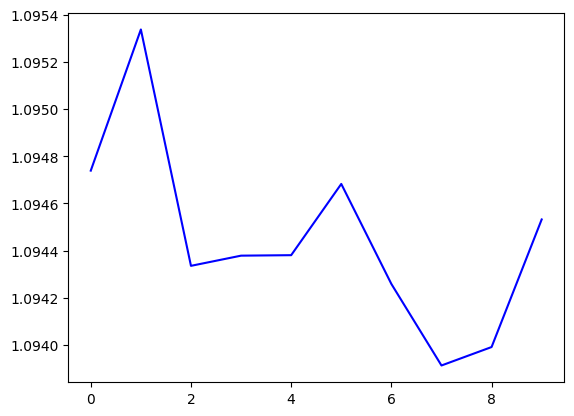

In [12]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()  

In [15]:
# Lưu 
model.save("/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/flowers.h5")
model_1=load_model('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/flowers.h5')
folder="/content/drive/MyDrive/HCMUTE Cơ-điện tử/Học máy/"

1/1 [==============================] - 0s 42ms/step
Banh mi


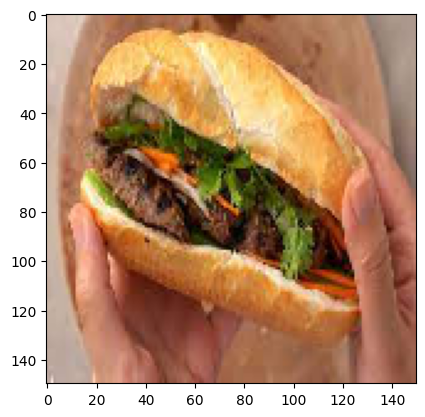

1/1 [==============================] - 0s 43ms/step
Banh mi


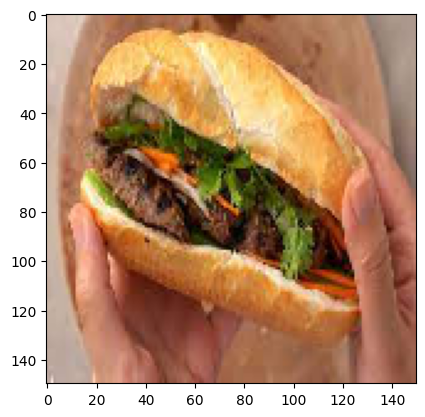

1/1 [==============================] - 0s 42ms/step
Banh mi


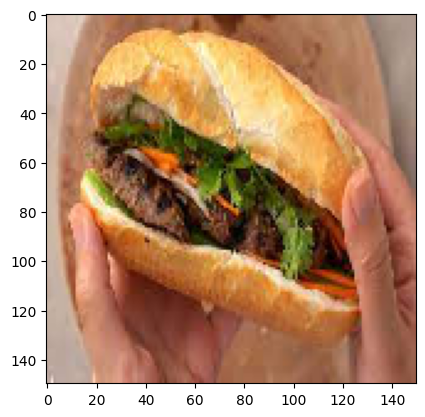

1/1 [==============================] - 0s 43ms/step
Banh mi


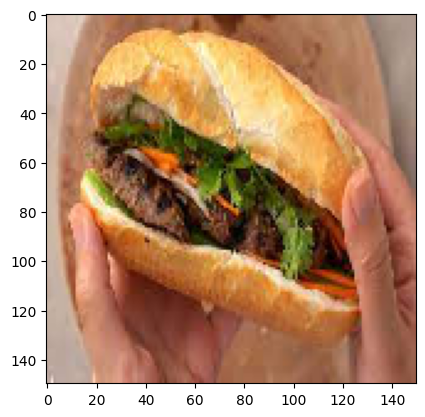

1/1 [==============================] - 0s 44ms/step
Banh mi


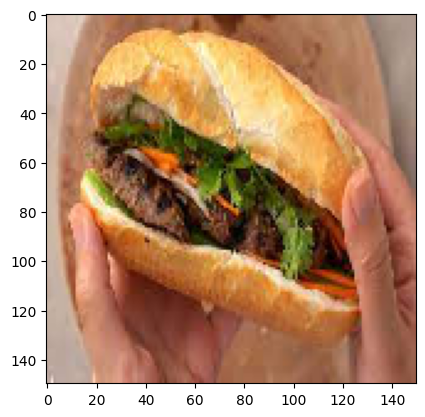

1/1 [==============================] - 0s 68ms/step
Banh mi


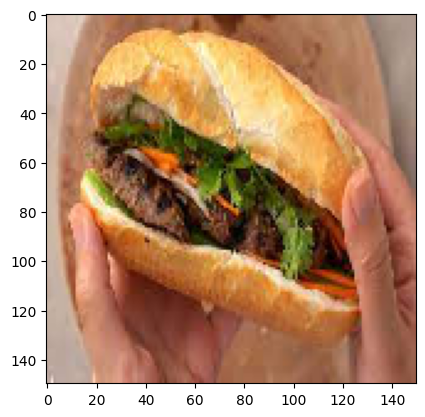

1/1 [==============================] - 0s 46ms/step
Banh mi


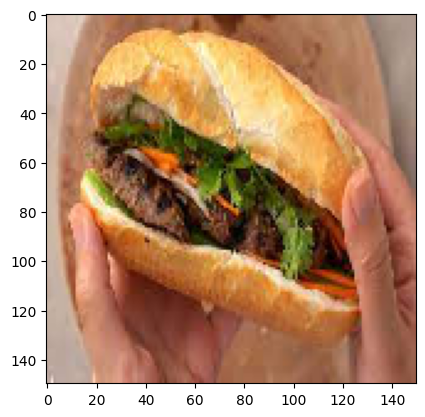

1/1 [==============================] - 0s 44ms/step
Banh mi


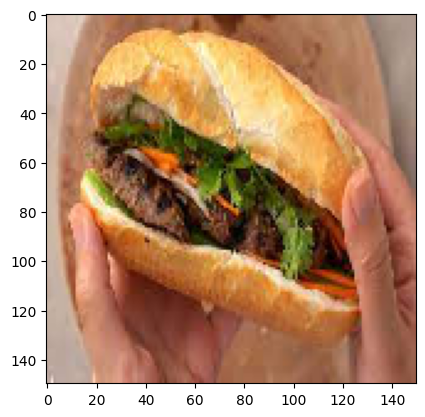

1/1 [==============================] - 0s 64ms/step
Banh mi


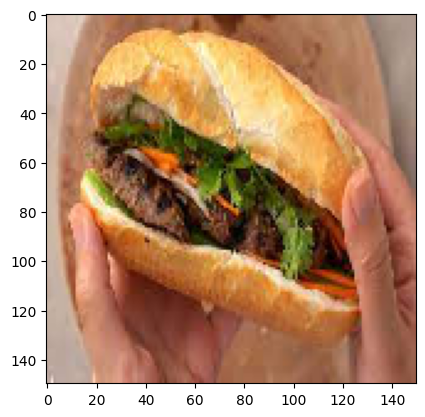

1/1 [==============================] - 0s 44ms/step
Banh mi


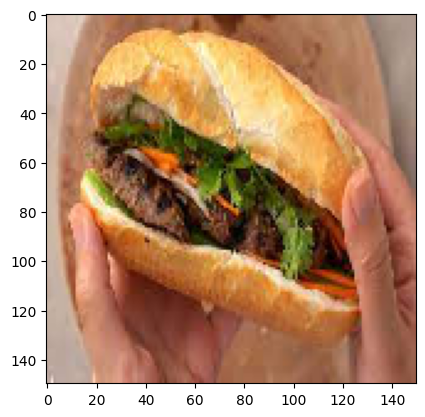

1/1 [==============================] - 0s 50ms/step
Banh mi


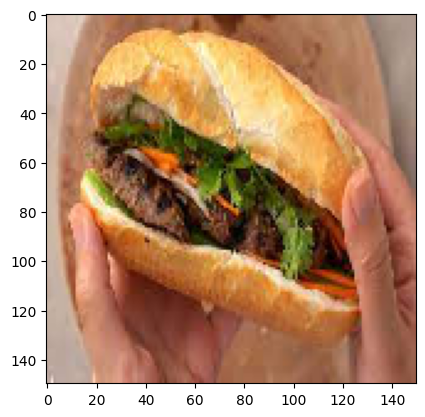

1/1 [==============================] - 0s 135ms/step
Banh mi


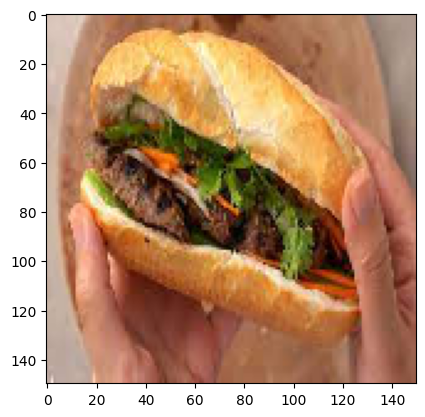

1/1 [==============================] - 0s 98ms/step
Banh mi


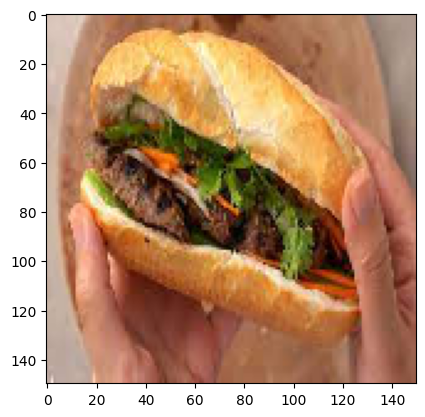

In [20]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/Test/test3.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Banh xeo', 'Bun bo Hue','Banh mi']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 67ms/step
Bun bo Hue


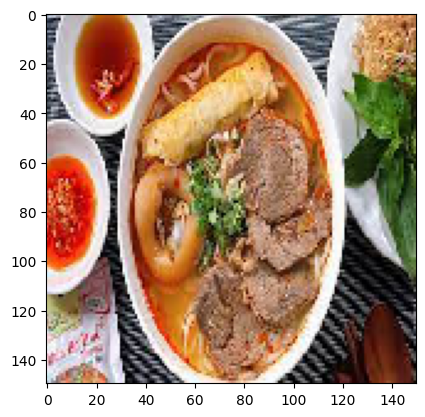

1/1 [==============================] - 0s 55ms/step
Bun bo Hue


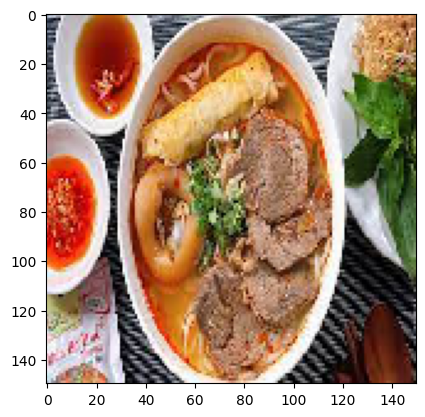

1/1 [==============================] - 0s 41ms/step
Bun bo Hue


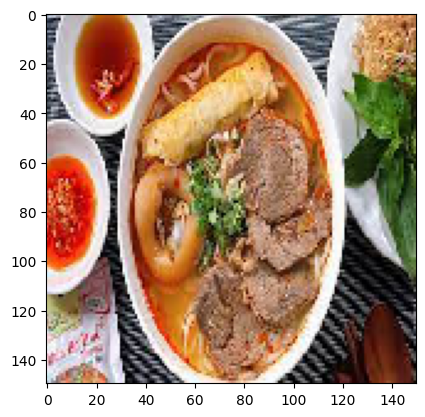

1/1 [==============================] - 0s 43ms/step
Bun bo Hue


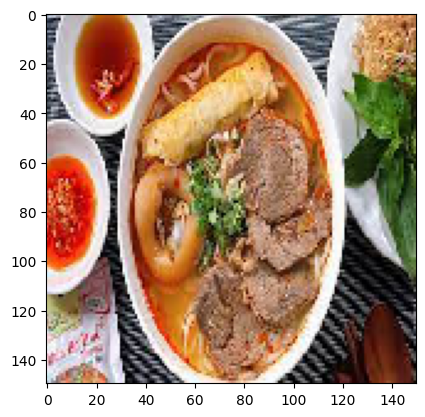

1/1 [==============================] - 0s 52ms/step
Bun bo Hue


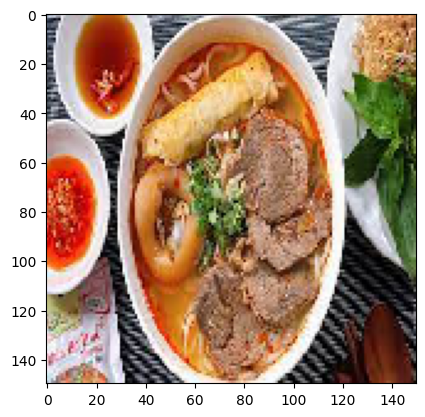

1/1 [==============================] - 0s 42ms/step
Bun bo Hue


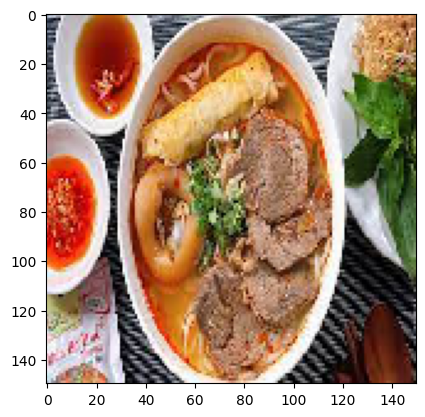

1/1 [==============================] - 0s 43ms/step
Bun bo Hue


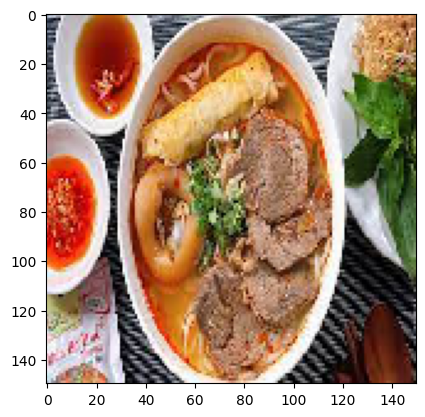

1/1 [==============================] - 0s 49ms/step
Bun bo Hue


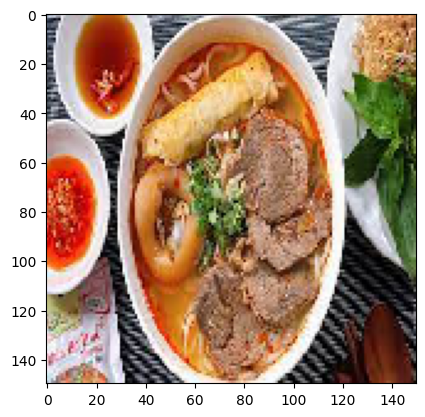

1/1 [==============================] - 0s 57ms/step
Bun bo Hue


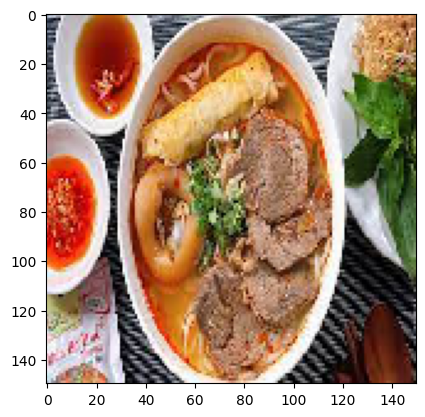

1/1 [==============================] - 0s 64ms/step
Bun bo Hue


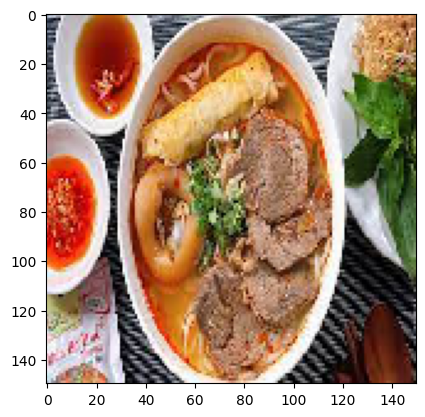

1/1 [==============================] - 0s 53ms/step
Bun bo Hue


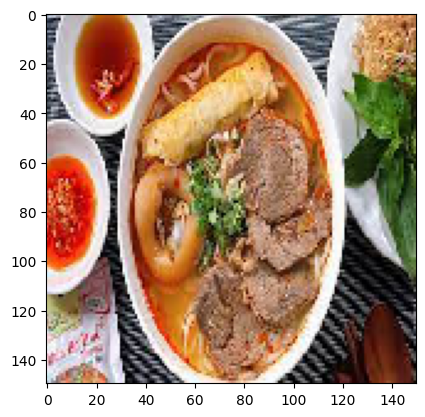

1/1 [==============================] - 0s 56ms/step
Bun bo Hue


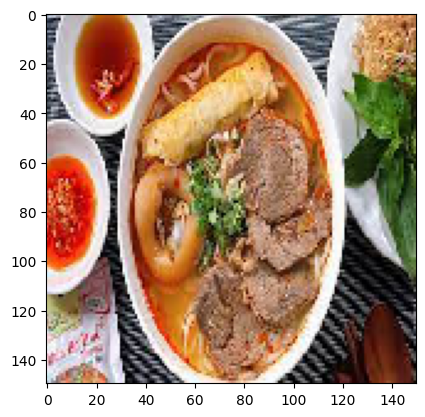

1/1 [==============================] - 0s 68ms/step
Bun bo Hue


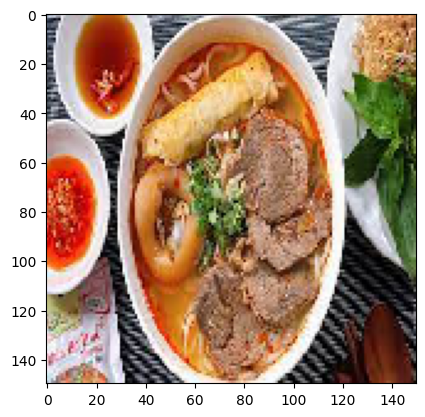

In [25]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/Test/test2.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Banh xeo','Banh mi', 'Bun bo Hue']
  print(class_name[result])
  plt.show()